In [1]:
import pandas as pd

In [7]:
md = pd.read_csv('Dataset/movies_metadata.csv',low_memory=False)

In [8]:
md.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


One of the most basic metrics you can think of is the ranking to decide which top 250 movies are based on their respective ratings.

However, using a rating as a metric has a few caveats:
- For one, it does not take into consideration the popularity of a movie. Therefore, a movie with a rating of 9 from 10 voters will be considered 'better' than a movie with a rating of 8.9 from 10,000 voters.
  For example, imagine you want to order Chinese food, you have a couple of options, one restaurant has a 5-star rating by only 5 people while the other restaurant has 4.5 ratings by 1000 people. Which restaurant would you prefer? The second one, right?
  Of course, there could be an exception that the first restaurant opened just a few days ago; hence, fewer people voted for it while, on the contrary, the second restaurant is operational for a year.

- On a related note, this metric will also tend to favor movies with a smaller number of voters with skewed and/or extremely high ratings. As the number of voters increases, the rating of a movie regularizes and approaches towards a value that is reflective of the movie's quality and gives the user a much better idea as to which movie he/she should choose. While it is difficult to discern the quality of a movie with extremely few voters, you might have to consider external sources to conclude.

Intinya lihat rating berdasarkan jumlah votenya juga , bukan hanya nilai ratingnya.
karena bisa saja ratingnya 10 tapi yang vote cuma 4, sehingga bila kita tidak proses yang begitu maka program akan merekomendasi movie tersebut karena ratingnya bagus

Rumus untuk menormalisasi rating dan jumlah vote

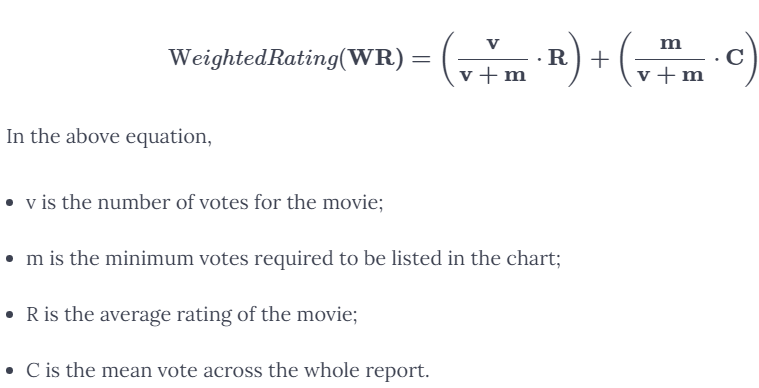

In [9]:
# Calculate mean of vote average column
C = md['vote_average'].mean()
print(C)

5.618207215134185


In [18]:
# Calculate the minimum number of votes required to be in the chart, m
m = md['vote_count'].quantile(0.90)
print(m)

160.0


In [19]:
# Filter out all qualified movies into a new DataFrame
q_movies = md.copy().loc[md['vote_count'] >= m]
q_movies.shape

(4555, 24)

In [20]:
# Function that computes the weighted rating of each movie
def weighted_rating(x, m=m, C=C):
    v = x['vote_count']
    R = x['vote_average']
    # Calculation based on the IMDB formula
    return (v/(v+m) * R) + (m/(m+v) * C)

In [21]:
# Define a new feature 'score' and calculate its value with `weighted_rating()`
q_movies['score'] = q_movies.apply(weighted_rating, axis=1)

In [23]:
#Sort movies based on score calculated above
q_movies = q_movies.sort_values('score', ascending=False)

In [25]:
q_movies[['title', 'vote_count', 'vote_average', 'score']].head(50)

,title,vote_count,vote_average,score
314,The Shawshank Redemption,8358.0,8.5,8.445869
834,The Godfather,6024.0,8.5,8.425439
10309,Dilwale Dulhania Le Jayenge,661.0,9.1,8.421453
12481,The Dark Knight,12269.0,8.3,8.265477
2843,Fight Club,9678.0,8.3,8.256385
292,Pulp Fiction,8670.0,8.3,8.251406
522,Schindler's List,4436.0,8.3,8.206639
23673,Whiplash,4376.0,8.3,8.205404
5481,Spirited Away,3968.0,8.3,8.196055
2211,Life Is Beautiful,3643.0,8.3,8.187171
